<a href="https://colab.research.google.com/github/damarescavalcante/detection_brain_tumor/blob/master/BrainTumor_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detection of Brain Tumor**




*   This dataset aims to analyze and brain image and check whether or not there is a tumor.
*   [Dataset](https://www.kaggle.com/jakeshbohaju/brain-tumor).
*   O arquivo é dividido em três seções: 

    1.   Preparação do Ambiente e dos Dados;
    2.   Árvore de Decisão;
    3.   Random Forest; e
    4.   Avaliação de ambos os modelos.







##**1. Preparação do Ambiente e dos Dados**

Montando o ambiente

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


####**1.1 Importando bibliotecas necessárias**


In [4]:
# Importando bibliotecas
import numpy as np
import pandas as pd

###**1.2 Carregamento dos dados na memória utilizando a biblioteca Pandas**

In [5]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/BrainTumor/BrainTumor.csv')

In [6]:
# verificando o dataframe
dados.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [7]:
#verificando colunas dos dados | mostra todas as columns
dados.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

###**1.3 Limpeza e organização dos dados**

In [8]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()
dados.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [9]:
#excluindo colunas que não serão utilizadas
dados = dados.drop(columns=['Image'])
dados.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


###**1.4 Re-escala dos dados**

Re-escala usando máximo e mínimo

In [10]:
#deixa todos os atributos na faixa de valores entre 0 e 1
dados = (dados - dados.min())/(dados.max()-dados.min())

###**1.5 Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributos de classe (target)**

In [11]:
X = dados.iloc[:,1:]
X.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0
1,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0
2,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0
3,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0
4,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0


In [12]:
y = dados.Class
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Class, dtype: float64

**Dividir os dados em treino e teste**

In [13]:
from sklearn.model_selection import train_test_split



*   Divide a matriz de dados em subconjuntos aleatórios de treino e teste
*   test_size: percentual do subconjunto para teste
*   random_state: define a semente para a aleatoriedade (se não definido, semente aleatório) - cada vez que se roda o teste será dividido em subconjuntos diferentes
*   List item






In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#random_state=42

In [15]:
X_train.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3564,0.217502,0.237466,0.470750,0.003741,0.077852,0.014257,0.021621,0.027839,0.002954,0.371252,0.156261,0.984170,0.650965
1168,0.431522,0.225826,0.458282,0.319021,0.008940,0.000968,0.017027,0.517723,0.288138,0.674675,0.087844,0.961773,0.000000
3006,0.293351,0.250921,0.484790,0.249822,0.037109,0.004746,0.057352,0.449495,0.221966,0.634205,0.175236,0.906991,0.000000
2801,0.134804,0.245166,0.478833,0.004775,0.128009,0.027792,0.019622,0.033861,0.003780,0.208587,0.187506,0.977603,0.000000
2584,0.196311,0.356235,0.583753,0.001493,0.100437,0.019482,0.030904,0.012756,0.001177,0.257361,0.211683,0.951268,0.000000


In [16]:
y_train.head()

3564    1.0
1168    0.0
3006    0.0
2801    1.0
2584    1.0
Name: Class, dtype: float64

##**2. Árvore de Decisão**

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#definindo modelo | não tem max_depth
classificador = DecisionTreeClassifier()

In [19]:
#treinando o modelo com a função fit
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [21]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

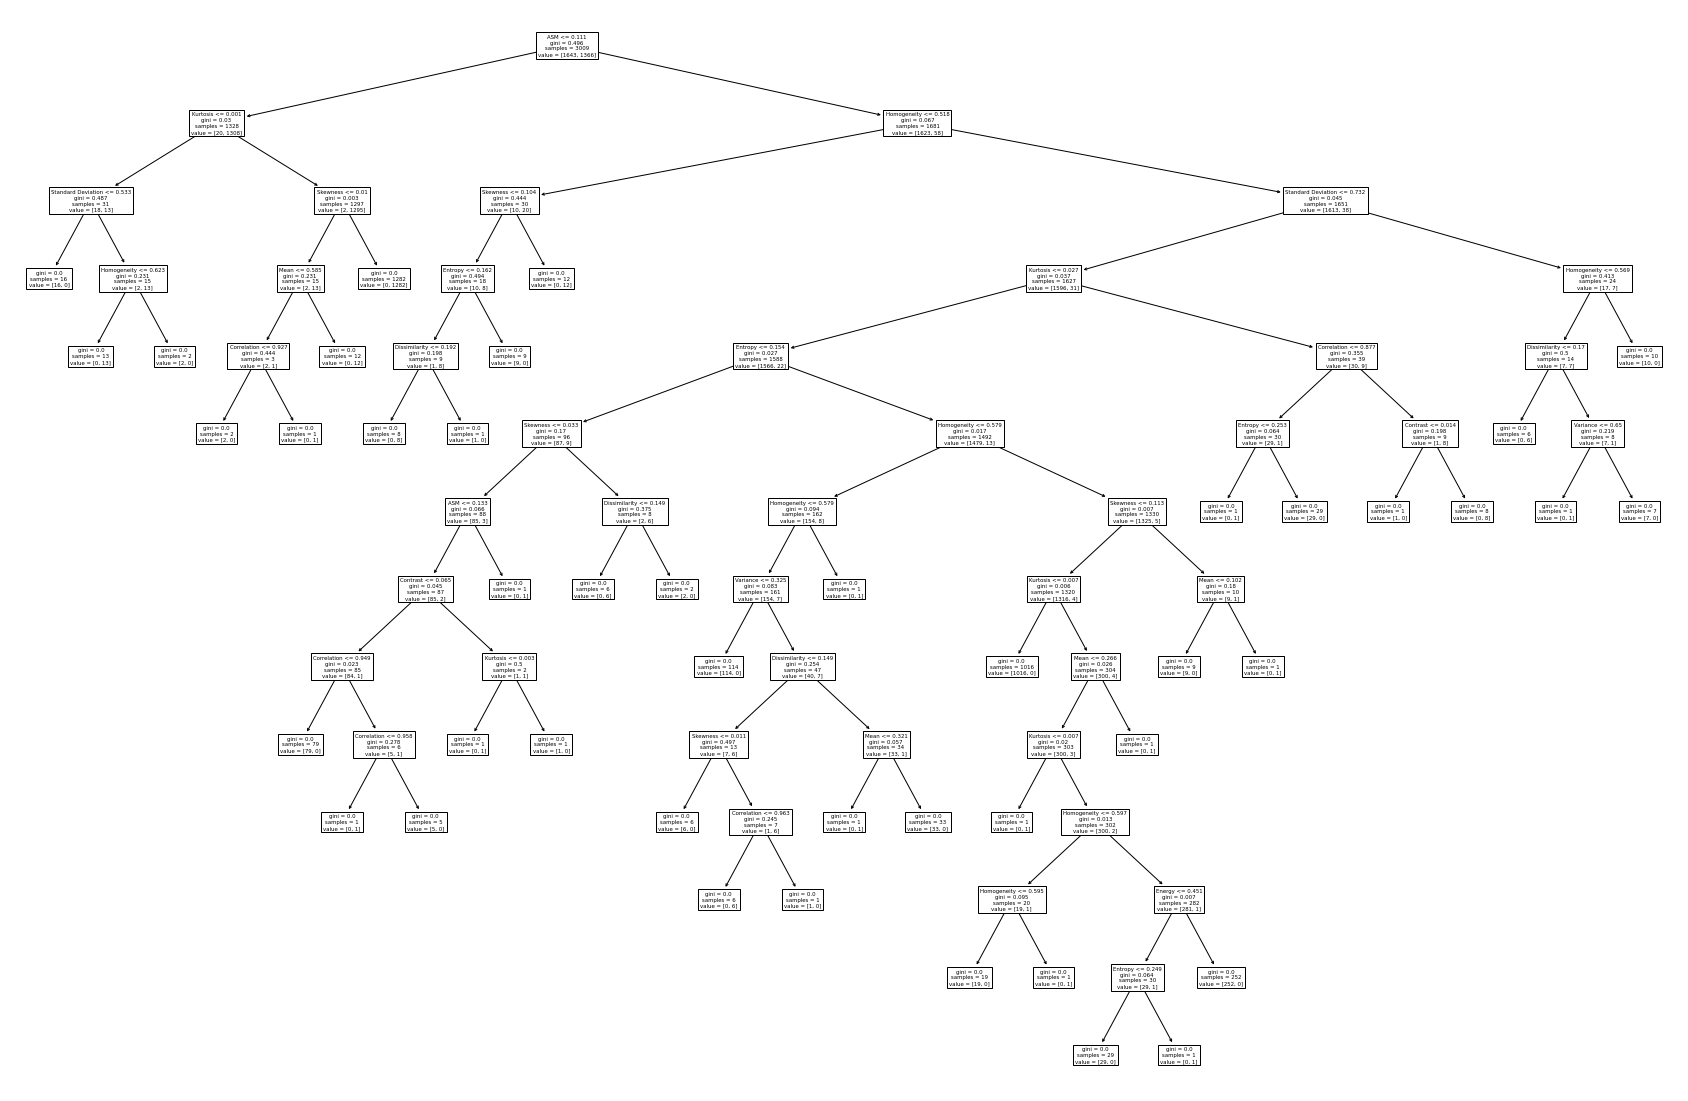

In [22]:
#plotagem sem o diagnóstico
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [23]:
#realizando a classificação
classificacao = classificador.predict(X_test)
#classificacao

In [51]:
#for i in range(len(y_test)):
#  print(y_test.iloc[i], '\t', classificacao[i])

##**3. Random Forest**

In [53]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
#realizando a classificação
classificacaoFloresta = floresta.predict(X_test)
#classificacaoFloresta

##**4. Avaliando os Modelos**

###**Árvore de Decisão X Random Forest**

Comparando os modelos de aprendizado de máquina por meio de validação cruzada.

In [55]:
#calculando os scores | retorna (acurácia média, desvio padrão)
scores = cross_val_score(classificador,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.936, 0.146)

In [57]:
#calculando os scores | retorna (acurácia média, desvio padrão)
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.951, 0.11)

Comparando ambos os modelos é possível perceber que o Random Forest possuí uma acurácia média superior à Árvore de Decisão, possuíndo portanto uma melhor correlação entre os dados de treino e dados de teste.